In [1]:
import sys
sys.path.append('..')
from src.pomdp import *
from src.mdp import VI_Solver

In [2]:
import numpy as np
import random

# POMDP Toy Problem

Symmetric 2 state, 2 action model

## Model definition

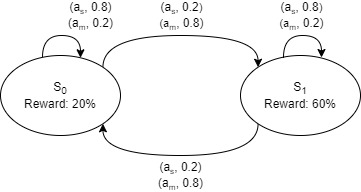

In [3]:
ACTION_COUNT = 2
STATE_COUNT = 2

In [4]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + a) % STATE_COUNT
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.8, 0.2],
       [0.2, 0.8]])

In [5]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7, 0.3],
       [0.3, 0.7]])

In [6]:
REWARD_PROBS = [0.2, 0.6]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p] = REWARD_PROBS[s_p]
        
reward_table

array([[[0.2, 0.6],
        [0.2, 0.6]],

       [[0.2, 0.6],
        [0.2, 0.6]]])

In [7]:
states = ['s0','s1']
actions = ['stay', 'move']
observations = ['s0', 's1']

model = POMDP_Model(states, actions, observations, transition_table, reward_table, observation_table)

## Solving

In [8]:
solver = PBVI_Solver(9,10,eps=0.001)

In [9]:
value_function, solve_history = solver.solve(model)

Converged early...


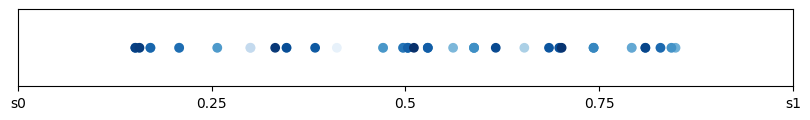

In [10]:
solve_history.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([4.30494182, 4.54494182]),
 AlphaVector([4.30424648, 4.54549099]),
 AlphaVector([4.54549099, 4.30424648]),
 AlphaVector([4.54699968, 4.30020577]),
 AlphaVector([4.54546052, 4.30429659]),
 AlphaVector([4.30020577, 4.54699968]),
 AlphaVector([4.27959937, 4.55205408]),
 AlphaVector([4.30429659, 4.54546052]),
 AlphaVector([4.55205408, 4.27959937]),
 AlphaVector([4.54692566, 4.30043235]),
 AlphaVector([4.17159937, 4.57365408]),
 AlphaVector([4.30425697, 4.54548559]),
 AlphaVector([4.54494182, 4.30494182]),
 AlphaVector([4.54548559, 4.30425697]),
 AlphaVector([4.30043235, 4.54692566]),
 AlphaVector([4.57365408, 4.17159937]),
 AlphaVector([4.30429874, 4.54545894])]

<Figure size 600x400 with 0 Axes>

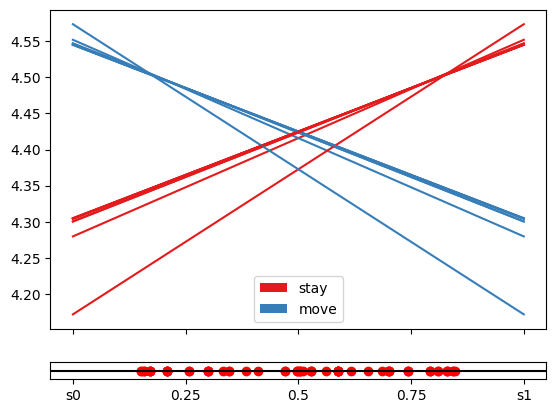

In [12]:
solve_history.plot_solution(4)

In [13]:
solve_history.save_history_video()

Video saved at 'Results/s2-a2-ssea-g0.9-e0.001-20230820_142008.mp4'...


## MDP Version of the probelm

In [14]:
vi_solver = VI_Solver(gamma=0.9)

In [15]:
vi_solution, vi_solve_history = vi_solver.solve(model)

In [16]:
solve_history.save_history_video(custom_name='comparison', compare_with=vi_solve_history)

Video saved at 'Results/comparison-s2-a2-ssea-g0.9-e0.001-20230820_142008.mp4'...
